In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#importing the ILPD data
liverdata = pd.read_csv('indian_liver_patient.csv')

In [5]:
datatype=liverdata.dtypes.index
datatype

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
liverdata.shape
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [7]:
liverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [8]:
liverdata.isnull().values.any()

True

In [9]:
liverdata.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
#albumin_and_globulin_ratio has null values
liverdata['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [11]:
liverdata['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [12]:
liverdata["Albumin_and_Globulin_Ratio"].fillna(liverdata['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

In [13]:
liverdata.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

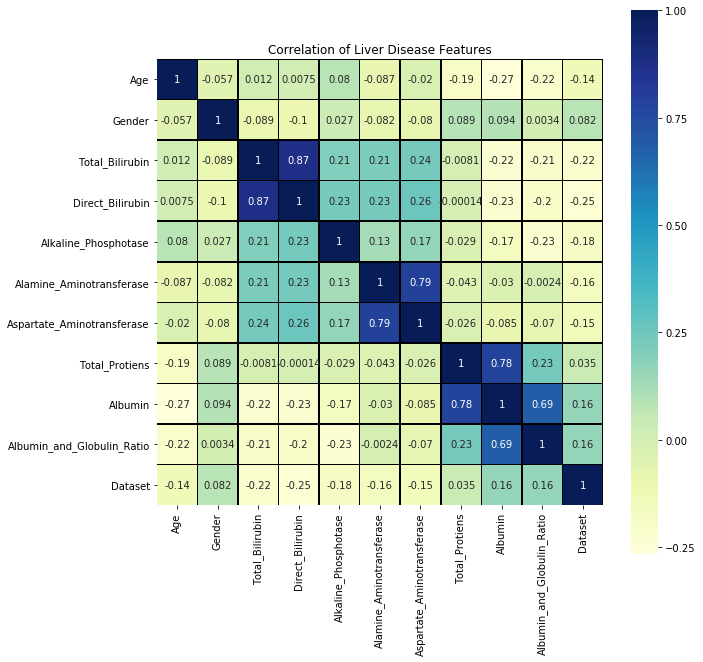

In [14]:
plt.subplots(figsize=(10,10))
sns.heatmap(liverdata.corr(),linewidths=0.5,linecolor='black',vmax=1.0,square=True,cmap="YlGnBu",annot=True)
plt.title('Correlation of Liver Disease Features')
plt.show()

In [16]:
def partition(x):
    if x == 2:
        return 0
    return 1

liverdata['Dataset'] = liverdata['Dataset'].map(partition)


liverdata.head(250)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.900000,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.740000,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.890000,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.000000,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.400000,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.300000,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.000000,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.100000,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.200000,0
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.000000,1


In [17]:
## output value has '1' for liver disease and '2' for no liver disease so making it 0 for no disease 

def partition(x):
    if x =='Male':
        return 0
    return 1

liverdata['Gender'] = liverdata['Gender'].map(partition)


liverdata.head(250)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.900000,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.740000,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.890000,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.000000,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.400000,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.300000,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.000000,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.100000,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.200000,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.000000,1


In [18]:
count_class_0, count_class_1 = liverdata['Dataset'].value_counts()

# Divide by class
data_class0 = liverdata[liverdata['Dataset'] == 0]
data_class1 = liverdata[liverdata['Dataset'] == 1]

liverdata = pd.concat([data_class0,data_class1.head(250)], axis=0)
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
12,64,1,0.9,0.3,310,61,58,7.0,3.4,0.90,0
15,25,1,0.6,0.1,183,91,53,5.5,2.3,0.70,0
17,33,1,1.6,0.5,165,15,23,7.3,3.5,0.92,0
24,63,1,0.9,0.2,194,52,45,6.0,3.9,1.85,0
28,20,1,1.1,0.5,128,20,30,3.9,1.9,0.95,0
29,84,1,0.7,0.2,188,13,21,6.0,3.2,1.10,0
32,57,1,1.0,0.3,187,19,23,5.2,2.9,1.20,0
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0


In [19]:
liverdata.shape

(417, 11)

In [20]:
X = liverdata.drop('Dataset',axis=1)
Y = liverdata['Dataset']


Number of patients diagnosed with liver disease:  250
Number of patients not diagnosed with liver disease:  167


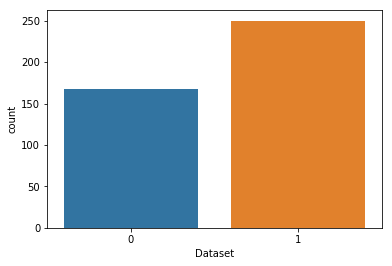

In [21]:
sns.countplot(data=liverdata, x = 'Dataset', label='Count')

LD,NLD = liverdata['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

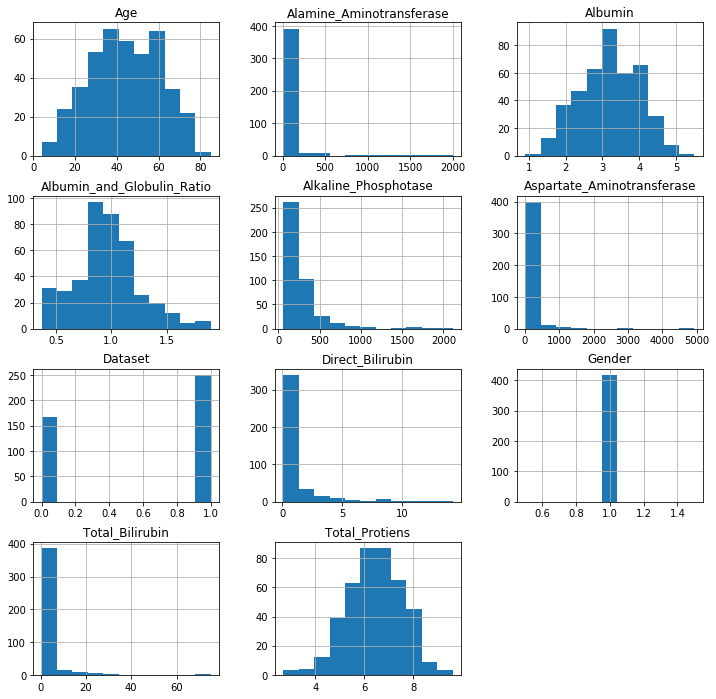

In [22]:
liverdata.hist(bins=11,figsize=(12,12))
plt.show()

In [23]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)


#scaling of the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/home/asus/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(kernel="rbf", probability=True, C=0.1, gamma=0.001), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

svm_model.fit(X_train,Y_train)

/home/asus/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/asus/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
Y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)

In [27]:
cm = np.array(confusion_matrix(Y_test,Y_predict,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,41,37
No_Liver_Disease,7,41


In [28]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.53      0.85      0.65        48
           1       0.85      0.53      0.65        78

   micro avg       0.65      0.65      0.65       126
   macro avg       0.69      0.69      0.65       126
weighted avg       0.73      0.65      0.65       126



In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.08%
